In [1]:
!wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv'

--2025-06-11 08:59:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.02s   

2025-06-11 08:59:27 (8.46 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd
dataset = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')

In [3]:
dataset = dataset[['Date','Closing Price (USD)']].copy()

In [4]:
dataset.set_index('Date')

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


In [5]:
dataset = dataset.rename(columns = {'Closing Price (USD)':'Price'})

In [25]:
HORIZON = 1
WINDOW_SIZE = 7
N_NEURONS = 512
N_EPOCHS = 500
N_LAYERS = 4
N_STACKS = 30
BATCH_SIZE=1024

In [7]:
for i in range(1,WINDOW_SIZE+1):
  dataset[f'Price {i}'] = dataset['Price'].shift(i)

In [8]:
dataset

,Date,Price,Price 1,Price 2,Price 3,Price 4,Price 5,Price 6,Price 7
0,2013-10-01,123.654990,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-02,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-10-03,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN,NaN
3,2013-10-04,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN,NaN
4,2013-10-05,121.338660,118.674660,108.584830,125.455000,123.654990,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2782,2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2783,2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2784,2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679
2785,2021-05-17,45604.615754,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426


In [9]:
dataset = dataset.dropna()

In [10]:
dataset_X = dataset.drop(columns = ['Price','Date']).to_numpy()
dataset_Y = dataset['Price'].to_numpy()

In [11]:
dataset_X,dataset_Y

(array([[  121.795     ,   120.65533   ,   121.33866   , ...,
           108.58483   ,   125.455     ,   123.65499   ],
        [  123.033     ,   121.795     ,   120.65533   , ...,
           118.67466   ,   108.58483   ,   125.455     ],
        [  124.049     ,   123.033     ,   121.795     , ...,
           121.33866   ,   118.67466   ,   108.58483   ],
        ...,
        [50032.69313676, 49764.1320816 , 52147.82118698, ...,
         55715.54665129, 58102.19142623, 58788.20967893],
        [47885.62525472, 50032.69313676, 49764.1320816 , ...,
         56573.5554719 , 55715.54665129, 58102.19142623],
        [45604.61575361, 47885.62525472, 50032.69313676, ...,
         52147.82118698, 56573.5554719 , 55715.54665129]]),
 array([  123.033     ,   124.049     ,   125.96116   , ...,
        47885.62525472, 45604.61575361, 43144.47129086]))

In [12]:
test_size = 0.2
length = int(len(dataset_X)*(1-test_size))

In [13]:
length,len(dataset_X),len(dataset_Y)

(2224, 2780, 2780)

In [14]:
train_X = dataset_X[:length,:]
train_Y = dataset_Y[:length]
test_X = dataset_X[length:,:]
test_Y = dataset_Y[length:]

In [15]:
len(train_X),len(train_Y)

(2224, 2224)

In [16]:
train_X.shape

(2224, 7)

In [17]:
import tensorflow as tf

train_data = tf.data.Dataset.from_tensor_slices((train_X,train_Y)).batch(1024).prefetch(tf.data.AUTOTUNE)
test_data = tf.data.Dataset.from_tensor_slices((test_X,test_Y)).batch(1024).prefetch(tf.data.AUTOTUNE)

train_data,test_data


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [26]:
class internal_block(tf.keras.layers.Layer):
  def __init__(self,n_neurons,n_layers,input_size,theta_size,horizon,window_size,**kwargs):
    super().__init__(**kwargs)

    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.input_size = input_size
    self.theta_size = theta_size
    self.window_size = window_size
    self.horizon = horizon

    self.layers = [tf.keras.layers.Dense(n_neurons,activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size,activation='relu')

  def call(self,input):
    x= input
    for i in self.layers:
      x = i(x)

    x = self.theta_layer(x)
    return x[:,:self.window_size],x[:,-self.horizon:]




In [27]:
inputs = tf.keras.layers.Input(shape = (WINDOW_SIZE,))

forcast,residual = internal_block(n_neurons=N_NEURONS,n_layers=N_LAYERS,input_size=WINDOW_SIZE,theta_size=WINDOW_SIZE+HORIZON,horizon=HORIZON,window_size=WINDOW_SIZE)(inputs)

for i in range(1,N_STACKS):
  f,r  =internal_block(n_neurons=N_NEURONS,n_layers=N_LAYERS,input_size=WINDOW_SIZE,theta_size=WINDOW_SIZE+HORIZON,horizon=HORIZON,window_size=WINDOW_SIZE)(residual)
  forecast = tf.keras.layers.add([f,forcast])
  residual = tf.keras.layers.subtract([residual,r])

outputs = tf.keras.layers.Dense(HORIZON,activation='relu')(forecast)

model = tf.keras.Model(inputs = inputs,outputs = outputs)

model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])

model.fit(train_data,epochs = N_EPOCHS,validation_data = test_data,callbacks = [tf.keras.callbacks.EarlyStopping(monitor='mae',patience=100,restore_best_weights=True),tf.keras.callbacks.ReduceLROnPlateau(monitor='mae',patience=100),tf.keras.callbacks.ModelCheckpoint('N-BEATS_checkpoint.weights.h5',save_best_only=True,save_weights_only=True)])

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 70s 9s/step - loss: 6272094.0000 - mae: 1508.3344 - mape: 84.8247 - mse: 6272094.0000 - val_loss: 69427528.0000 - val_mae: 6027.6870 - val_mape: 30.6194 - val_mse: 69427528.0000 - learning_rate: 0.0010
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 788ms/step - loss: 11747584.0000 - mae: 1812.9313 - mape: 53.1417 - mse: 11747584.0000 - val_loss: 4129462.7500 - val_mae: 1221.7008 - val_mape: 5.4410 - val_mse: 4129462.7500 - learning_rate: 0.0010
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 2982400.0000 - mae: 857.9768 - mape: 18.5292 - mse: 2982400.0000 - val_loss: 178105200.0000 - val_mae: 10026.1396 - val_mape: 49.6533 - val_mse: 178105200.0000 - learning_rate: 0.0010
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 2980582.0000 - mae: 999.0582 - mape: 46.8288 - mse: 2980582.0000 - val_loss: 6504974.0000 - val_mae: 1644.1138 - val_mape: 7.7163 - val_mse: 6504974.0000 - learning_rate: 0.0010
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2

In [35]:
inputs = tf.keras.layers.Input(shape = (WINDOW_SIZE,))

forcast,residual = internal_block(n_neurons=N_NEURONS,n_layers=N_LAYERS,input_size=WINDOW_SIZE,theta_size=WINDOW_SIZE+HORIZON,horizon=HORIZON,window_size=WINDOW_SIZE)(inputs)

for i in range(1,N_STACKS):
  f,r  =internal_block(n_neurons=N_NEURONS,n_layers=N_LAYERS,input_size=WINDOW_SIZE,theta_size=WINDOW_SIZE+HORIZON,horizon=HORIZON,window_size=WINDOW_SIZE)(residual)
  forecast = tf.keras.layers.add([f,forcast])
  residual = tf.keras.layers.subtract([residual,r])

outputs = tf.keras.layers.Dense(HORIZON,activation='relu')(forecast)

model = tf.keras.Model(inputs = inputs,outputs = outputs)

model.compile(loss = 'mse',optimizer = 'adam',metrics = ['mae','mse','mape'])


In [36]:
model.load_weights('/content/N-BEATS_checkpoint.weights.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 606 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [63]:
results = model.evaluate(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1206477.6250 - mae: 580.4224 - mape: 2.6076 - mse: 1206477.6250


In [64]:
results = pd.DataFrame({'Model':'N_BEATS','loss(mse)':[results[0]],'mae':[results[1]],'mape':[results[2]]}).set_index('Model')
results

,loss(mse),mae,mape
Model,,,
N_BEATS,1206477.625,580.422424,1206477.625


In [37]:
predicted = model.predict(test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [41]:
import numpy as np

predicted = np.squeeze(predicted)
predicted.shape

(556,)

In [42]:
test_d = test_Y

In [44]:
test_d.shape

(556,)

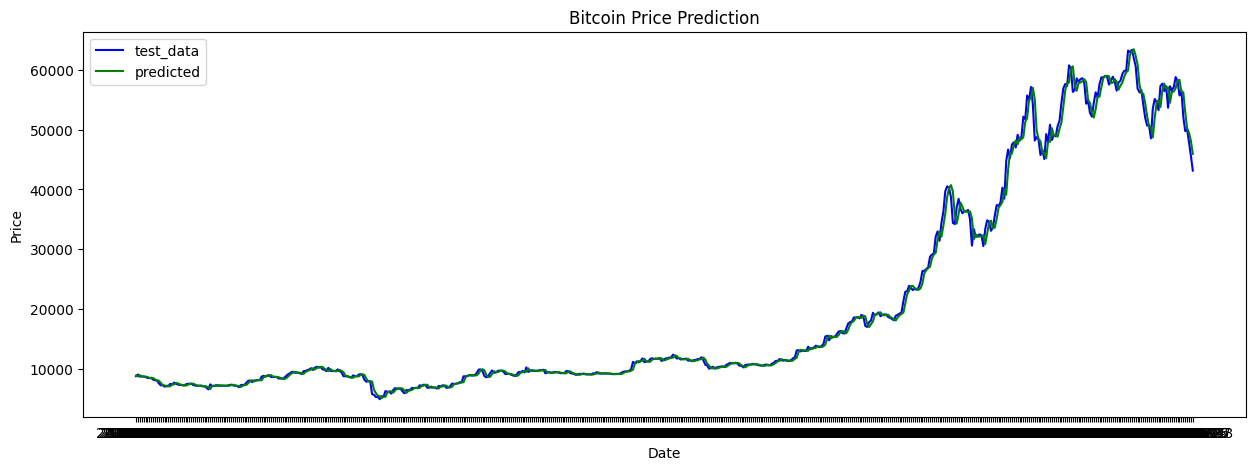

In [53]:
import matplotlib.pyplot as plt

X_a = dataset['Date'].iloc[length:].to_numpy()

plt.figure(figsize=(15,5))
plt.plot(X_a,test_d,label='test_data',color='blue')
plt.plot(X_a,predicted,label='predicted',color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bitcoin Price Prediction')
plt.legend()